In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import xarray as xr
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sys.path.append('/home/cucchi/phd/devel/phd/')
RESP_PATH = '/home/cucchi/phd/data/response/lorenz96/rk4/SF_8_1.0_0/'

In [4]:
from lab import analysis
from lab.simulation import forcings

In [5]:
response_p1 = xr.open_dataarray(os.path.join(RESP_PATH, 'response_lorenz96_rk4_energy_SF_8_1.0_0.nc'))
response_p1 = response_p1.values
response_p1 = np.squeeze(response_p1)

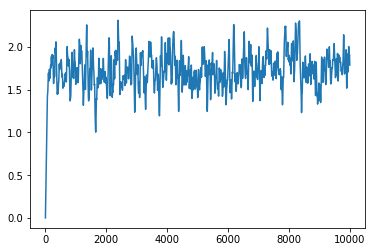

In [6]:
plt.plot(response_p1)

In [7]:
chi = analysis.compute_susceptibility(response_p1)

/home/cucchi/miniconda3/envs/l96/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


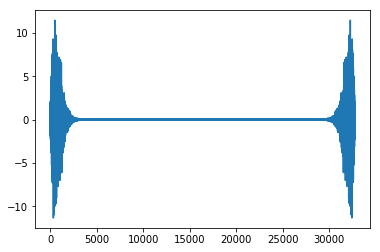

In [8]:
plt.plot(chi)

In [9]:
resp_pred = analysis.compute_response(chi, forcings.StepForcing(force_intensity_delta=0.5))

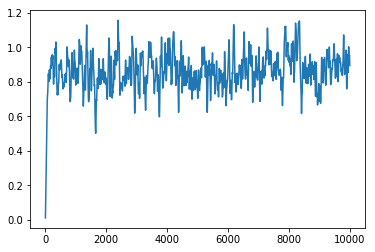

In [10]:
plt.plot(resp_pred[0:10000])

In [11]:
resp_real = xr.open_dataarray('/home/cucchi/phd/data/response/lorenz96/rk4/SF_8_0.5_0/response_lorenz96_rk4_energy_SF_8_0.5_0.nc')

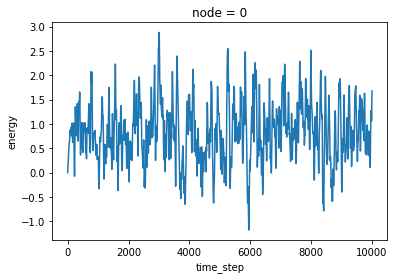

In [12]:
resp_real.plot()

In [13]:
resp_pred[0:10000].mean()

0.8624431201742031

Let's see what happens with semi-difference

In [14]:
RESP_PATH = '/home/cucchi/phd/data/response/lorenz96/rk4/SF_8_-1.0_0/'
response_m1 = xr.open_dataarray(os.path.join(RESP_PATH, 'response_lorenz96_rk4_energy_SF_8_-1.0_0.nc'))
response_m1 = response_m1.values
response_m1 = np.squeeze(response_m1)

In [15]:
response = (response_p1 - response_m1)/2

In [16]:
chi = analysis.compute_susceptibility(response)

In [17]:
resp_pred = analysis.compute_response(chi, forcings.StepForcing(force_intensity_delta=0.5))

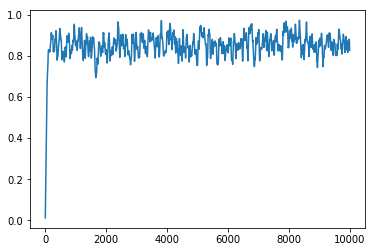

In [18]:
plt.plot(resp_pred[0:10000])

In [19]:
resp_pred[0:10000].mean()

0.8519194991821423

In [20]:
resp_pred[0:10000].std()

0.06076600083743598

In [21]:
resp_real.mean()

<xarray.DataArray 'energy' ()>
array(0.833317, dtype=float32)

In [22]:
resp_real.std()

<xarray.DataArray 'energy' ()>
array(0.599837, dtype=float32)

In [26]:
RESP_PATH = '/home/cucchi/phd/data/response/lorenz96/rk4/SF_8_1.0_0/'
response_p1 = xr.open_dataarray(os.path.join(RESP_PATH, 'response_lorenz96_rk4_energy_SF_8_1.0_0.nc'))

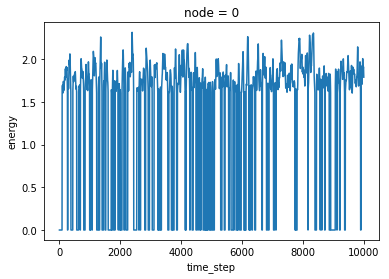

In [37]:
obs = response_p1.where(response_p1 > 1.6, 0)
obs.plot()

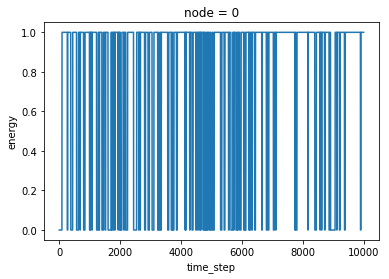

In [38]:
obs = obs.where(obs == 0, 1)
obs.plot()